In [1]:
# Libraries and constants
import numpy as np
import matplotlib.pyplot as plt 
import time 
from sklearn import linear_model
from termcolor import colored

max = 1000
tests = 100

In [2]:
# Testing functions
def crete_data(features,samples):

    a = np.random.rand(samples,features)
    x = np.random.rand(features)
    b = np.random.rand(samples)

    y = a @ x + b

    # ax + b = y
    return a , x , y

def test_algorithns( obj , samples ):
    
    proportions = []
    inv_proportions = []
    durations = []
    scores = []
    
    percentage=1

    for i in range(samples) :
        
        if ( 100 * ( (i+1) / samples ) >= 10*percentage ) : 
            print(colored("    ",on_color="on_blue"),end="",flush=True)
            percentage+=1

        n = np.random.randint(1,max)
        m = np.random.randint(1,max)
        
        a , x , y = crete_data(n,m)
        
        proportion = []
        inv_proportion = []
        duration = []
        score = []

        for j in range(len(obj)) :

            start = time.time()
            obj[j].fit(a,y)
            duration += [time.time() - start]

            score += [np.linalg.norm(a@obj[j].coef_ - y)]
            proportion += [m/n]
            inv_proportion += [n/m]

        proportions += [proportion]
        inv_proportions += [inv_proportion]
        durations += [duration]
        scores += [score]

    print()
    return np.array(proportions) , np.array(inv_proportions) , np.array(scores) , np.array(durations)

In [3]:
def plot_data_3d(x , y , z):
    plt.scatter(x, y, c=z, cmap='magma')
    plt.xlabel("Proportions - (m/n)")
    plt.ylabel("Scores - ||y_found - y_real||")
    plt.colorbar(label='Time of execution - seconds')
    return 

|   O codigo comecou a ser executado   |
                                        
|   O codigo acabou de ser testado !   |


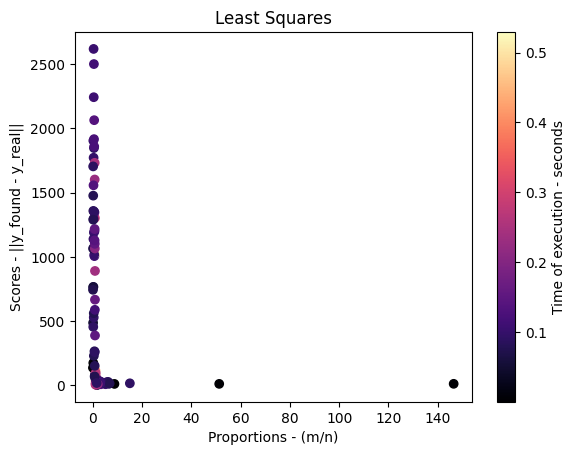

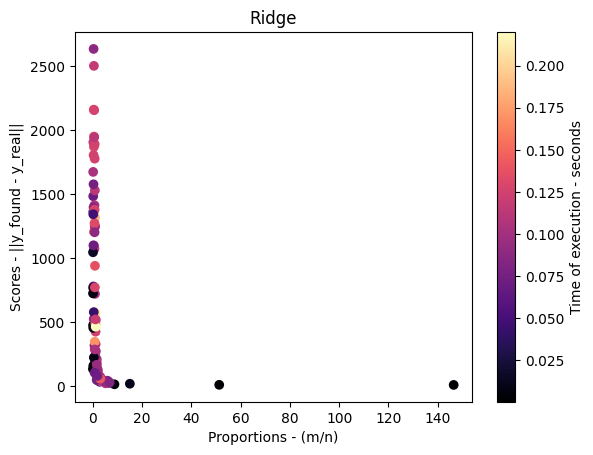

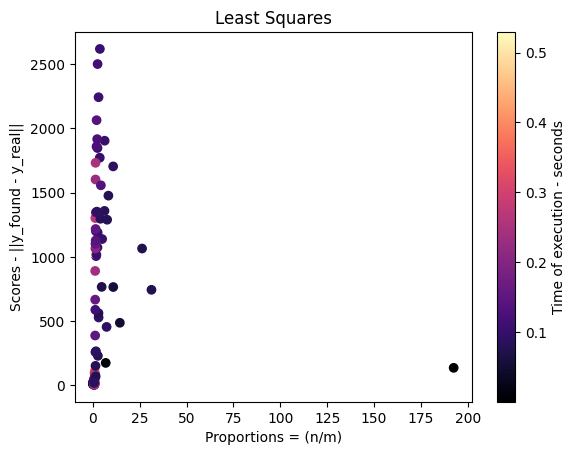

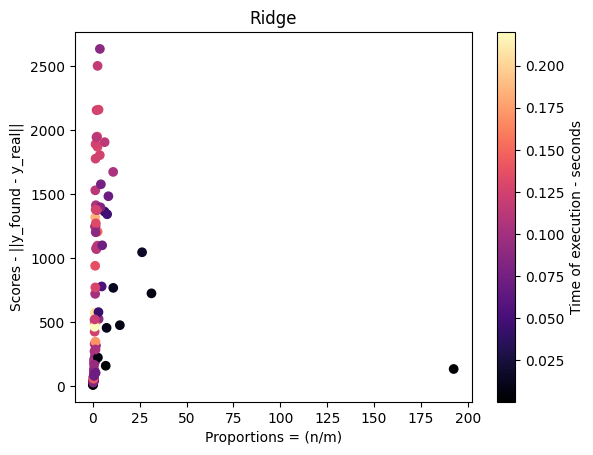

In [4]:
# main 

print("|   O codigo comecou a ser executado   |")
a , a_ , b , c = test_algorithns( ( linear_model.LinearRegression() , linear_model.Ridge() ) ,tests)
print("|   O codigo acabou de ser testado !   |")

plot_data_3d(a[:,0],b[:,0],c[:,0])
plt.title("Least Squares")
plt.show()

plot_data_3d(a[:,1],b[:,1],c[:,1])
plt.title("Ridge")
plt.show()

plot_data_3d(a_[:,0],b[:,0],c[:,0])
plt.title("Least Squares")
plt.xlabel("Proportions = (n/m)")
plt.show()

plot_data_3d(a_[:,1],b[:,1],c[:,1])
plt.title("Ridge")
plt.xlabel("Proportions = (n/m)")
plt.show()